### OPERATORNORM WITHOUT ADJOINT 

- Creator:  Jonas Bresch, M.Sc
- Date: February 14rd, 2025

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

import imp

/var/folders/x8/2j6ym0tn7x18f9h9pmv136mc0000gn/T/ipykernel_44944/852982894.py:5: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp


In [2]:
import adjointfreenorm
imp.reload(adjointfreenorm)

<module 'adjointfreenorm' from '/Users/jonasbresch/Desktop/operator_missmatch/finale/adjointfreenorm.py'>

### Figure 4 - 1000x500

iter. 	| func-value 	| residuum  	| sing-vec-error
10000 	|  2.818e+03 	|  3.931e+01 	|  1.376e-02
||A|| =  53.08621757394392
iter. 	| func-value 	| residuum 	| sing-vec-error
10000 	|  5.142e+01 	|  2.032e+00 	|  1.703e-03
||A|| =  51.42337230519088


/usr/local/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


iter. 	| func-value 	| residuum  	| sing-vec-error
10000 	|  2.846e+03 	|  4.384e+01 	|  1.517e-02
||A|| =  53.34381807426709
iter. 	| func-value 	| residuum 	| sing-vec-error
10000 	|  5.147e+01 	|  2.286e+00 	|  8.639e-02
||A|| =  51.46708880948022
iter. 	| func-value 	| residuum  	| sing-vec-error
10000 	|  2.840e+03 	|  6.132e+01 	|  2.114e-02
||A|| =  53.289526198527156
iter. 	| func-value 	| residuum 	| sing-vec-error
10000 	|  5.140e+01 	|  2.462e+00 	|  9.214e-02
||A|| =  51.39971020478352
iter. 	| func-value 	| residuum  	| sing-vec-error
10000 	|  2.823e+03 	|  6.088e+01 	|  2.112e-02
||A|| =  53.12757310542734
iter. 	| func-value 	| residuum 	| sing-vec-error
10000 	|  5.093e+01 	|  2.767e+00 	|  7.639e-02
||A|| =  50.930389323461554
iter. 	| func-value 	| residuum  	| sing-vec-error
10000 	|  2.837e+03 	|  1.582e+01 	|  5.545e-03
||A|| =  53.26570431492803
iter. 	| func-value 	| residuum 	| sing-vec-error
10000 	|  5.134e+01 	|  2.078e+00 	|  1.755e-03
||A|| =  51.336094916

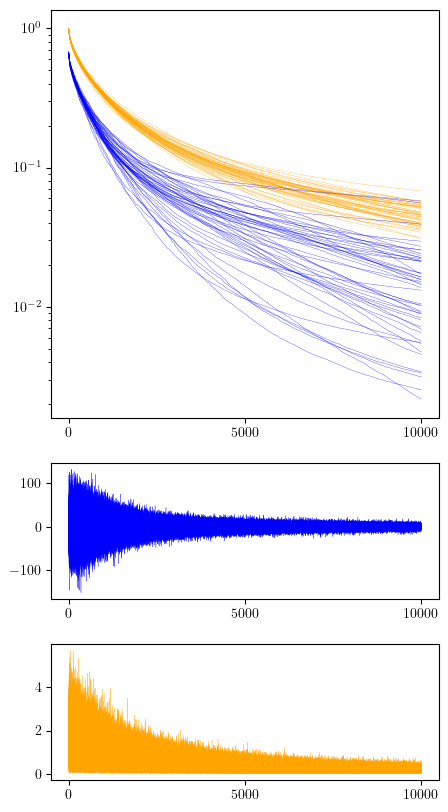

In [4]:
fig, axs = plt.subplots(3, 1, figsize=(5,10), gridspec_kw={'height_ratios': [3, 1, 1]})
for k in range(50):
    A = np.random.randn(1000,500)
    V = np.zeros((500,1000))
    _, _, vvsol, vvval, _, lista, _ = adjointfreenorm.MatFreeAdjNorm(A=A, iter=10000, eps=1e-10, nor=1, show=0)
    _, _, vu_sol, _, _, vuval, _, _, listbc_uv, _, _, _, _, _ = adjointfreenorm.MatFreeAdjOpNormDouble(A=A, V=V, iter=10000, eps=1e-10, show=0)
    axs[0].plot((vvsol-np.abs(vvval))/vvsol, linewidth=0.2, c='b')
    axs[0].plot((vu_sol-np.abs(vuval))/vu_sol, linewidth=0.2, c='orange')
    axs[0].semilogy()
    axs[1].plot(lista, linewidth=0.2, c='b')
    axs[2].plot(listbc_uv, linewidth=0.2, c='orange')
    plt.setp(axs, xticks=[0, 5000, 10000], xticklabels=['0', '5000', '10000'])
    plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.savefig('gaussian_matrix_1000_500.pdf', dpi=100)
plt.show()